# Классификация - и снова в бой!


Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основные методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, необходимой предобработки, feature engineering и поиск лучшего варианта, который даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

Первая информация о датасете:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3 

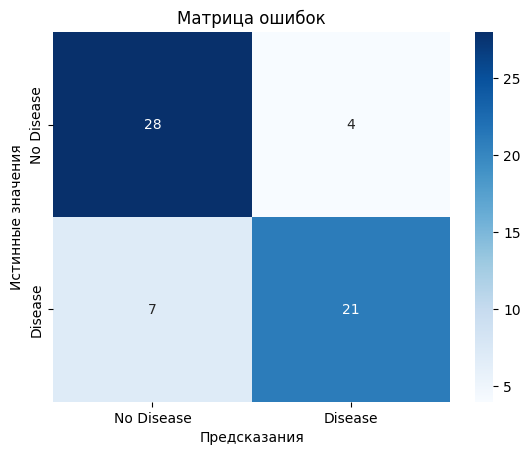

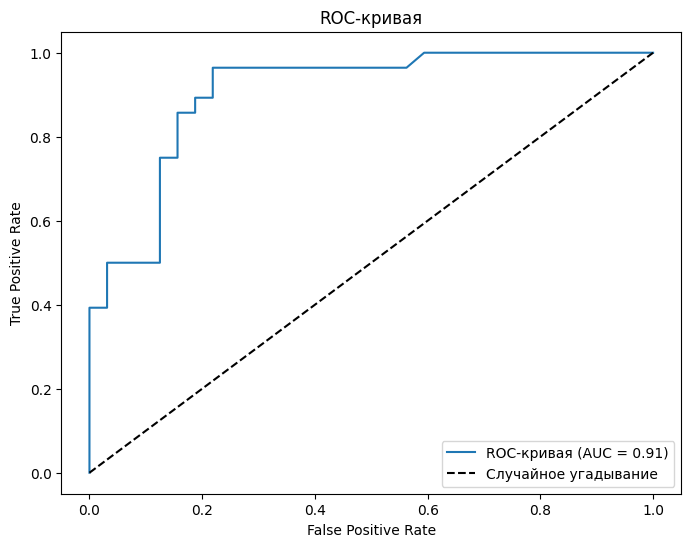

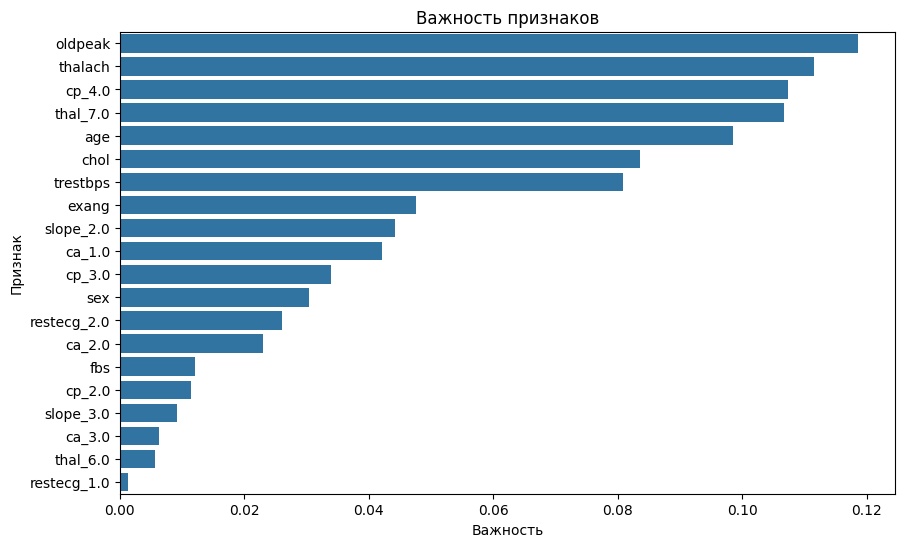


Анализ ошибок с учетом важности правильной классификации больных:
False Negatives (пропущенные больные): 7
False Positives (ложные тревоги): 4


In [3]:
# Классификация - и снова в бой!

# Сегодняшняя задачка: предсказываем болезни сердца
# 
# Мы освоили основные методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!
# 
# Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!
# 
# В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.
# 
# Как всегда, ждем от вас полноценного анализа исходных данных, необходимой предобработки, feature engineering и поиск лучшего варианта, который даст наибольшую метрику!
# 
# * Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

# Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

data = pd.read_csv(url, names=columns, na_values="?")

# Анализ исходных данных
print("Первая информация о датасете:")
print(data.head())
print("\nИнформация о датасете:")
print(data.info())

# Обработка пропущенных значений
data.dropna(inplace=True)
print(f"\nПосле удаления пропусков размер датасета: {data.shape}")

# Преобразование целевой переменной в бинарный формат
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Feature engineering: преобразование категориальных переменных в дамми-переменные
categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Разделение на признаки и целевую переменную
X = data.drop('target', axis=1)
y = data['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Построение модели (Random Forest)
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность (Accuracy): {accuracy:.2f}")
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Предсказания')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')
plt.show()

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-кривая (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Случайное угадывание")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

# Важность признаков
feature_importances = pd.DataFrame({'Признак': X.columns, 'Важность': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Важность', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Важность', y='Признак', data=feature_importances)
plt.title('Важность признаков')
plt.show()

# Балансировка для задачи под звездочкой
print("\nАнализ ошибок с учетом важности правильной классификации больных:")
print("False Negatives (пропущенные больные):", conf_matrix[1, 0])
print("False Positives (ложные тревоги):", conf_matrix[0, 1])
